In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
from scipy.special import expit as sigmoid

In [35]:
df_target = pd.read_csv("lucas_organic_carbon_target.csv")
df_test = pd.read_csv("lucas_organic_carbon_training_and_test_data.csv")

# ------------------------- Ü1 -------------------------

In [36]:
df_target.head()

,x
0,very_low
1,very_low
2,very_low
3,moderate
4,low


In [37]:
df_test.head()

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
0,0.000276,0.000278,0.000280,0.000281,0.000283,0.000284,0.000286,0.000288,0.000289,0.000291,...,-0.000070,-0.000068,-0.000065,-0.000063,-0.000060,-0.000058,-0.000056,-0.000053,-0.000051,-0.000048
1,0.000351,0.000353,0.000355,0.000357,0.000358,0.000360,0.000362,0.000364,0.000366,0.000368,...,-0.000041,-0.000038,-0.000036,-0.000034,-0.000031,-0.000029,-0.000026,-0.000024,-0.000022,-0.000019
2,0.000330,0.000331,0.000333,0.000335,0.000337,0.000339,0.000341,0.000343,0.000344,0.000346,...,-0.000086,-0.000084,-0.000081,-0.000079,-0.000076,-0.000074,-0.000072,-0.000069,-0.000067,-0.000064
3,0.000300,0.000303,0.000305,0.000307,0.000309,0.000312,0.000314,0.000316,0.000318,0.000320,...,-0.000109,-0.000105,-0.000100,-0.000096,-0.000092,-0.000088,-0.000084,-0.000080,-0.000076,-0.000072
4,0.000388,0.000390,0.000391,0.000393,0.000395,0.000397,0.000399,0.000401,0.000403,0.000405,...,-0.000076,-0.000074,-0.000072,-0.000070,-0.000067,-0.000065,-0.000063,-0.000061,-0.000059,-0.000057


In [38]:
# Daten vorbereiten
X = df_test  # Features
y = df_target['x']  # Labels/Zielvariable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

# Random Forest Modell erstellen und trainieren
rf_model = RandomForestClassifier(
    n_estimators=100,      # Anzahl der Bäume
    max_depth=None,        # Maximale Tiefe der Bäume
    random_state=42,       # Für Reproduzierbarkeit
    n_jobs=-1              # Nutzt alle verfügbaren CPU-Kerne
)

# Modell trainieren
rf_model.fit(X_train, y_train)

# Vorhersagen machen
predictions = rf_model.predict(X_test)

# Modell evaluieren
print("Accuracy:")
print(accuracy_score(y_test, predictions))

print("Klassifikationsbericht:")
print(classification_report(y_test, predictions))

# Feature Importance analysieren
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 5 wichtigste Features:")
print(feature_importance.head(5))

Accuracy:
0.7844080846968239
Klassifikationsbericht:
              precision    recall  f1-score   support

        high       0.57      0.51      0.54       136
         low       0.36      0.12      0.18       232
    moderate       0.46      0.35      0.39       193
   very_high       0.71      0.59      0.64        29
    very_low       0.85      0.97      0.91      1488

    accuracy                           0.78      2078
   macro avg       0.59      0.51      0.53      2078
weighted avg       0.74      0.78      0.75      2078


Top 5 wichtigste Features:
     feature  importance
3514  2257.0    0.007409
3515  2257.5    0.007002
3503  2251.5    0.006338
3517  2258.5    0.006263
3518  2259.0    0.006073


In [39]:
'''# Optimierung #1

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X, y)
print("Beste Parameter:", grid_search.best_params_)'''

'# Optimierung #1\n\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [10, None],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [2, 4]\n}\n\ngrid_search = GridSearchCV(\n    RandomForestClassifier(random_state=42),\n    param_grid,\n    cv=5,\n    n_jobs=-1\n)\n\ngrid_search.fit(X, y)\nprint("Beste Parameter:", grid_search.best_params_)'

In [40]:
'''# Optimierung #2

scores = cross_val_score(rf_model, X, y, cv=5)
print("Kreuzvalidierung Scores:", scores)
print("Durchschnittliche Genauigkeit: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))'''

'# Optimierung #2\n\nscores = cross_val_score(rf_model, X, y, cv=5)\nprint("Kreuzvalidierung Scores:", scores)\nprint("Durchschnittliche Genauigkeit: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))'

# ------------------------- Ü2 -------------------------

## Task1: Identify Overall Misclassification 
Patterns — Users want to understand which classes are frequently confused with others, providing insights into systematic misclassification trends.


In [41]:
importances = rf_model.feature_importances_
feature_name = X.columns

importance_df = pd.DataFrame(importances.reshape(1, -1), columns=feature_name)
importance_df

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
0,0.000475,0.000261,0.000528,0.000639,0.000335,0.000423,0.000904,0.000758,0.000511,0.000413,...,0.000274,0.000158,0.00023,0.00024,0.000226,0.000194,0.000266,0.00017,0.000271,0.000219


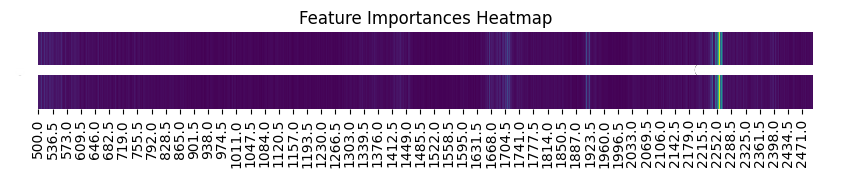

In [42]:
plt.figure(figsize=(10, 1))
sns.heatmap(importance_df, annot=True, cmap='viridis', cbar=False)
plt.title('Feature Importances Heatmap')
plt.show()

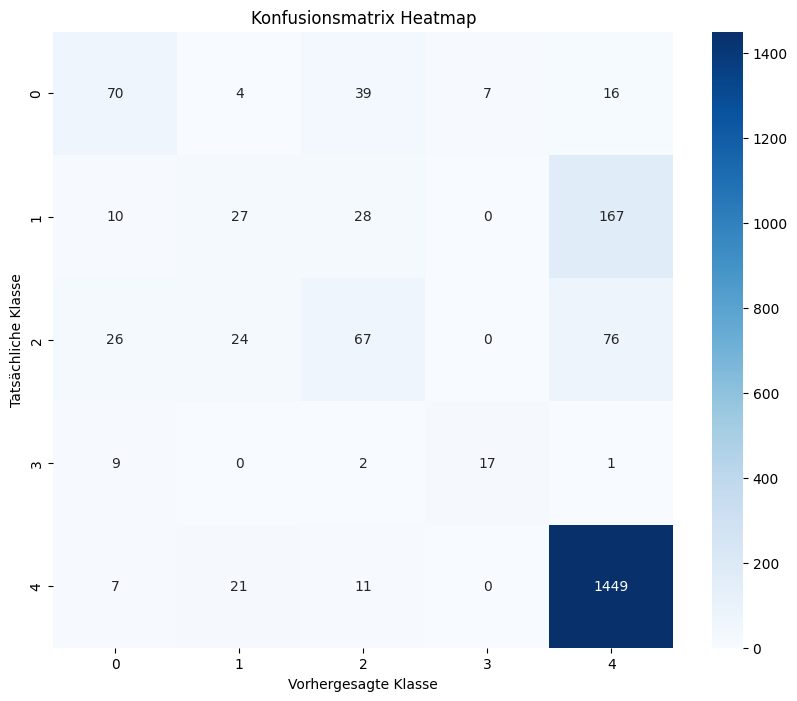

Am häufigsten verwechselte Klassenpaare:
Tatsächliche Klasse 1 wird oft als Klasse 4 fehlklassifiziert: 167 mal
Tatsächliche Klasse 2 wird oft als Klasse 4 fehlklassifiziert: 76 mal
Tatsächliche Klasse 0 wird oft als Klasse 2 fehlklassifiziert: 39 mal
Tatsächliche Klasse 1 wird oft als Klasse 2 fehlklassifiziert: 28 mal
Tatsächliche Klasse 2 wird oft als Klasse 0 fehlklassifiziert: 26 mal


In [43]:
def analyze_misclassifications(y_test, predictions):
    # Generiere Konfusionsmatrix
    cm = confusion_matrix(y_test, predictions)
    
    # Visualisierung
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Konfusionsmatrix Heatmap')
    plt.ylabel('Tatsächliche Klasse')
    plt.xlabel('Vorhergesagte Klasse')
    plt.show()
    
    # Detaillierter Klassifikationsbericht
    #print(classification_report(y_test, predictions))
    
    # Identifiziere am häufigsten verwechselte Klassenpaare
    def find_most_confused_classes(cm):
        n_classes = cm.shape[0]
        most_confused = []
        for i in range(n_classes):
            for j in range(n_classes):
                if i != j:
                    most_confused.append((i, j, cm[i, j]))
        
        # Sortiere nach Häufigkeit der Fehlklassifikation
        return sorted(most_confused, key=lambda x: x[2], reverse=True)[:5]
    
    print("Am häufigsten verwechselte Klassenpaare:")
    confused_pairs = find_most_confused_classes(cm)
    for true_class, pred_class, count in confused_pairs:
        print(f"Tatsächliche Klasse {true_class} wird oft als Klasse {pred_class} fehlklassifiziert: {count} mal")

# Rufe die Funktion mit deinen Variablen auf
analyze_misclassifications(y_test, predictions)

## Requirement
### R1. Present overview depicting class-by class accuracy
your system must present a clear and concise visual summary for each class that highlights the model's accuracy in predicting the class correctly while also identifying the classes it is most frequently confused with (Task 1)

In [44]:
# test

### R2. Depict True Positives, False Positives, False Negatives, and True Negatives
for each class, your system must the depict the True Positives, False Positives, False Negatives, and True Negatives to users (Task 1)


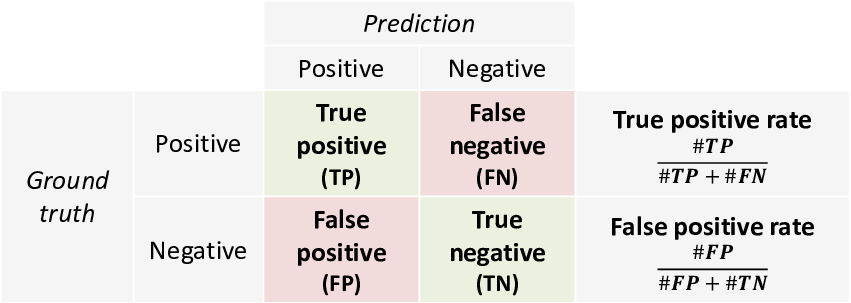

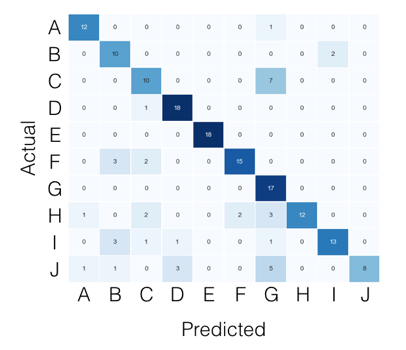
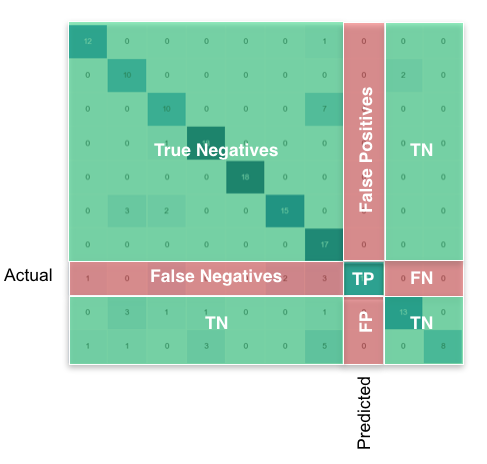

In [45]:
def ground_truth(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    #TN = cm.values.sum() - (FP + FN + TP)
    TN = cm.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print("True Positive:")
    print(TP)
    print("True Negative:")
    print(TN)
    print("False Positive:")
    print(FP)
    print("False Negative:")
    print(FN)

cm = confusion_matrix(y_test, predictions)
ground_truth(cm)

True Positive:
[  70   27   67   17 1449]
True Negative:
[1890 1797 1805 2042  330]
False Positive:
[ 52  49  80   7 260]
False Negative:
[ 66 205 126  12  39]


In [46]:
def calculate_metrics(cm):
    """
    Berechnet True Positives, False Positives, True Negatives, False Negatives
    und verschiedene Metriken wie Genauigkeit, Recall, Precision, F1-Score.
    
    Args:
        confusion_matrix (numpy.ndarray): Eine 2D Numpy-Array Konfusionsmatrix.
    
    Returns:
        dict: Ein Dictionary mit den berechneten Metriken.
    """
    tn = cm[0][0]
    fp = cm[0][1] 
    fn = cm[1][0]
    tp = cm[1][1]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    metrics = {
        'true_positives': tp,
        'false_positives': fp,
        'true_negatives': tn, 
        'false_negatives': fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }
    
    return metrics

cm = confusion_matrix(y_test, predictions)
metrics = calculate_metrics(cm)
print(metrics)

{'true_positives': 27, 'false_positives': 4, 'true_negatives': 70, 'false_negatives': 10, 'accuracy': 0.8738738738738738, 'precision': 0.8709677419354839, 'recall': 0.7297297297297297, 'f1_score': 0.7941176470588235}


In [47]:
# Step 1: Create a hashmap from a large list
large_list = np.random.rand(1000)  # Example large list
hashmap = {i: large_list[i] for i in range(len(large_list))}

# Convert hashmap to DataFrame for use in Random Forest
df_hashmap = pd.DataFrame(list(hashmap.items()), columns=['Index', 'Value'])

# Step 2: Use the hashmap as features for the Random Forest classifier
X = df_hashmap[['Index', 'Value']]
y = np.random.randint(0, 2, size=len(df_hashmap))  # Example binary target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

# Random Forest Modell erstellen und trainieren
rf_model = RandomForestClassifier(
    n_estimators=100,      # Anzahl der Bäume
    max_depth=None,        # Maximale Tiefe der Bäume
    random_state=42,       # Für Reproduzierbarkeit
    n_jobs=-1              # Nutzt alle verfügbaren CPU-Kerne
)

# Modell trainieren
rf_model.fit(X_train, y_train)

# Vorhersagen machen
predictions = rf_model.predict(X_test)

# Step 3: Apply the sigmoid function to the classifier's output
probabilities = rf_model.predict_proba(X_test)[:, 1]
sigmoid_probabilities = sigmoid(probabilities)

# Modell evaluieren
print("Accuracy:")
print(accuracy_score(y_test, predictions))

print("Klassifikationsbericht:")
print(classification_report(y_test, predictions))

# Feature Importance analysieren
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 5 wichtigste Features:")
print(feature_importance.head(5))

# Print sigmoid probabilities
print("\nSigmoid Probabilities:")
print(sigmoid_probabilities)

Accuracy:
0.5190476190476191
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       104
           1       0.53      0.49      0.51       106

    accuracy                           0.52       210
   macro avg       0.52      0.52      0.52       210
weighted avg       0.52      0.52      0.52       210


Top 5 wichtigste Features:
  feature  importance
1   Value     0.50414
0   Index     0.49586

Sigmoid Probabilities:
[0.5938731  0.68135373 0.57688526 0.59868766 0.70889017 0.6791787
 0.62948311 0.63645254 0.57199613 0.68135373 0.60108788 0.63645254
 0.6637387  0.57932425 0.65701046 0.65475346 0.51749286 0.65926039
 0.64336515 0.58419052 0.7047457  0.68352089 0.61538376 0.55724785
 0.62245933 0.69635493 0.5938731  0.6921095  0.62480647 0.60825903
 0.6637387  0.63181242 0.68783133 0.61538376 0.65475346 0.65248946
 0.57199613 0.67260702 0.5938731  0.62245933 0.61538376 0.60825903
 0.6637387  0.55971365 0.5621765  

In [48]:
# y_true = [1, 1, 0, 0]
# y_pred = [1, 0, 1, 0]   

# tn, fp, fn, tp = cm(y_test, predictions, labels=[0, 1]).ravel()
# print(tn, fp, fn, tp)  # 1 1 1 1

# ------------------------- Ü3 ------------------------

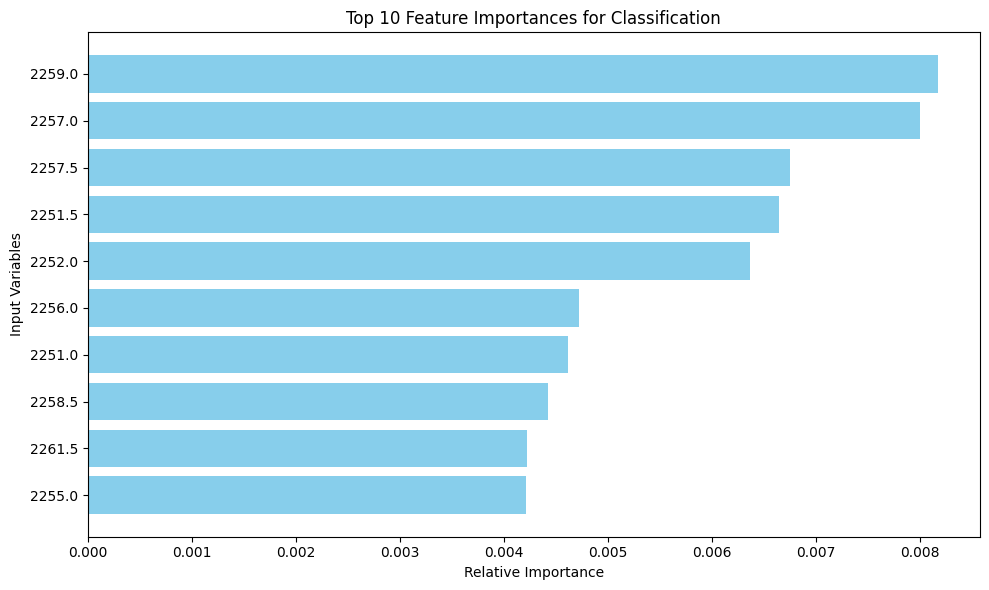

In [50]:
X = df_test  # Features
y = df_target['x']

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1][:10]  # Indizes der Top 10 Features

top_features = feature_names[sorted_indices]
top_importances = importances[sorted_indices]

# Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color="skyblue")
plt.xlabel("Relative Importance")
plt.ylabel("Input Variables")
plt.title("Top 10 Feature Importances for Classification")
plt.gca().invert_yaxis()  # Wichtigste oben anzeigen
plt.tight_layout()
plt.show()


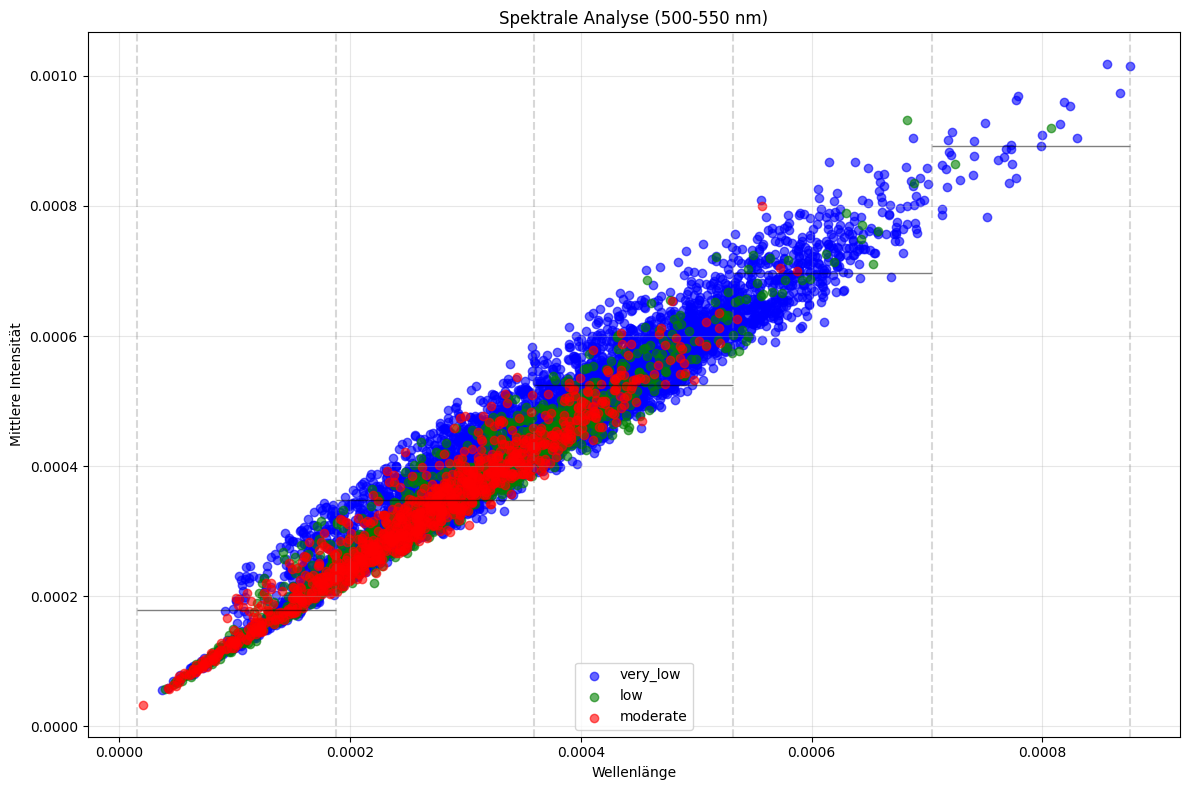

In [53]:
def plot_spectral_intervals(df_test, df_target, wavelength_range=(500, 550), num_intervals=5):
    """
    Erstellt einen Scatter Plot der spektralen Daten mit Intervallen.
    
    Parameters:
    df_test: DataFrame mit den spektralen Daten
    df_target: DataFrame mit den Zielkategorien
    wavelength_range: Tuple mit (start, end) für den Wellenlängenbereich
    num_intervals: Anzahl der gewünschten Intervalle
    """
    # Spalten im gewählten Wellenlängenbereich auswählen
    selected_columns = [col for col in df_test.columns 
                       if wavelength_range[0] <= float(col) <= wavelength_range[1]]
    
    # Mittelwert für jede Zeile im ausgewählten Bereich
    mean_values = df_test[selected_columns].mean(axis=1)
    
    # Erste Wellenlänge im Bereich für x-Achse
    x_values = df_test[selected_columns[0]]
    
    # Figure erstellen
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Scatter Plot mit Farben basierend auf Target
    colors = {'very_low': 'blue', 'low': 'green', 'moderate': 'red'}
    
    for category in colors:
        mask = df_target['x'] == category
        ax.scatter(x_values[mask], mean_values[mask], 
                  label=category, alpha=0.6, c=colors[category])
    
    # Intervalle erstellen
    x_min, x_max = x_values.min(), x_values.max()
    interval_width = (x_max - x_min) / num_intervals
    intervals = [(x_min + i*interval_width, x_min + (i+1)*interval_width) 
                for i in range(num_intervals)]
    
    # Intervalle visualisieren
    for start, end in intervals:
        # Vertikale Linien für Intervallgrenzen
        ax.axvline(x=start, color='gray', linestyle='--', alpha=0.3)
        
        # Punkte im aktuellen Intervall
        mask = (x_values >= start) & (x_values <= end)
        if any(mask):
            y_mean = mean_values[mask].mean()
            ax.hlines(y=y_mean, xmin=start, xmax=end, 
                     color='black', linewidth=1, alpha=0.5)
    
    ax.axvline(x=x_max, color='gray', linestyle='--', alpha=0.3)
    
    # Beschriftungen und Layout
    ax.set_xlabel('Wellenlänge')
    ax.set_ylabel('Mittlere Intensität')
    ax.set_title(f'Spektrale Analyse ({wavelength_range[0]}-{wavelength_range[1]} nm)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Funktion aufrufen für einen spezifischen Wellenlängenbereich
plot_spectral_intervals(df_test, df_target, 
                       wavelength_range=(500, 550),  # Sie können diesen Bereich anpassen
                       num_intervals=5)              # Anzahl der Intervalle anpassen